# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [72]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn. linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('data/temps.csv')

### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [74]:
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [8]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [75]:
week = {'Fri' : 5,
        'Sat' : 6,
        'Sun' : 7,
        'Mon' : 1,
        'Tues' : 2,
        'Wed': 3,
        'Thurs' : 4}

In [76]:
df['week'] = df['week'].replace(week)
df

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_13984\4044636342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week'] = df['week'].replace(week)


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,5,45,45,45.6,45,43,50,44,29
1,2016,1,2,6,44,45,45.7,44,41,50,44,61
2,2016,1,3,7,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,2,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,2,42,42,45.2,47,41,50,47,47
344,2016,12,28,3,42,47,45.3,48,41,49,44,58
345,2016,12,29,4,47,48,45.3,48,43,50,45,65
346,2016,12,30,5,48,48,45.4,57,44,46,44,42


In [77]:
df['year'].unique()

array([2016])

In [78]:
df.drop(columns = 'year', inplace = True)

<Axes: >

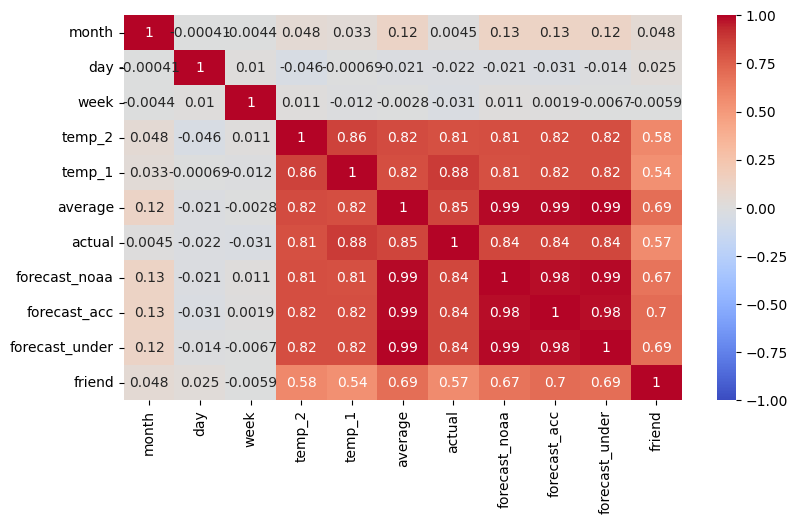

In [79]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

No hay casi correlación con month day y week

In [80]:
df.drop(columns = ['month', 'day', 'week'],inplace = True)

<Axes: >

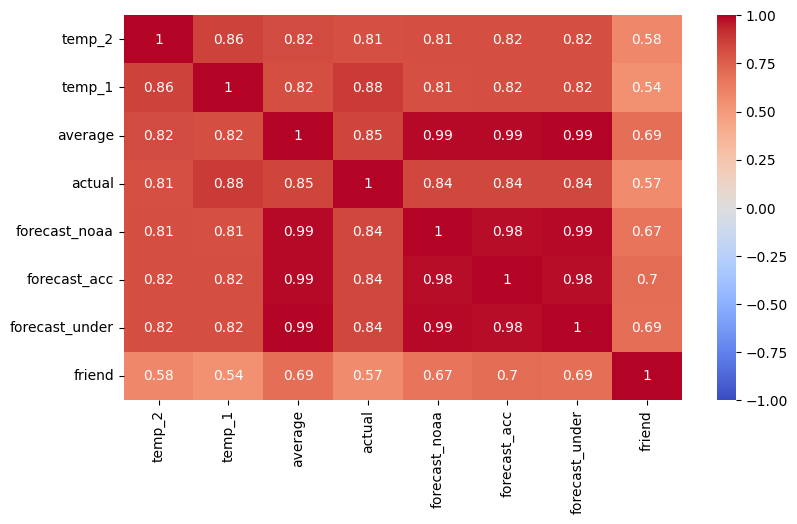

In [81]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

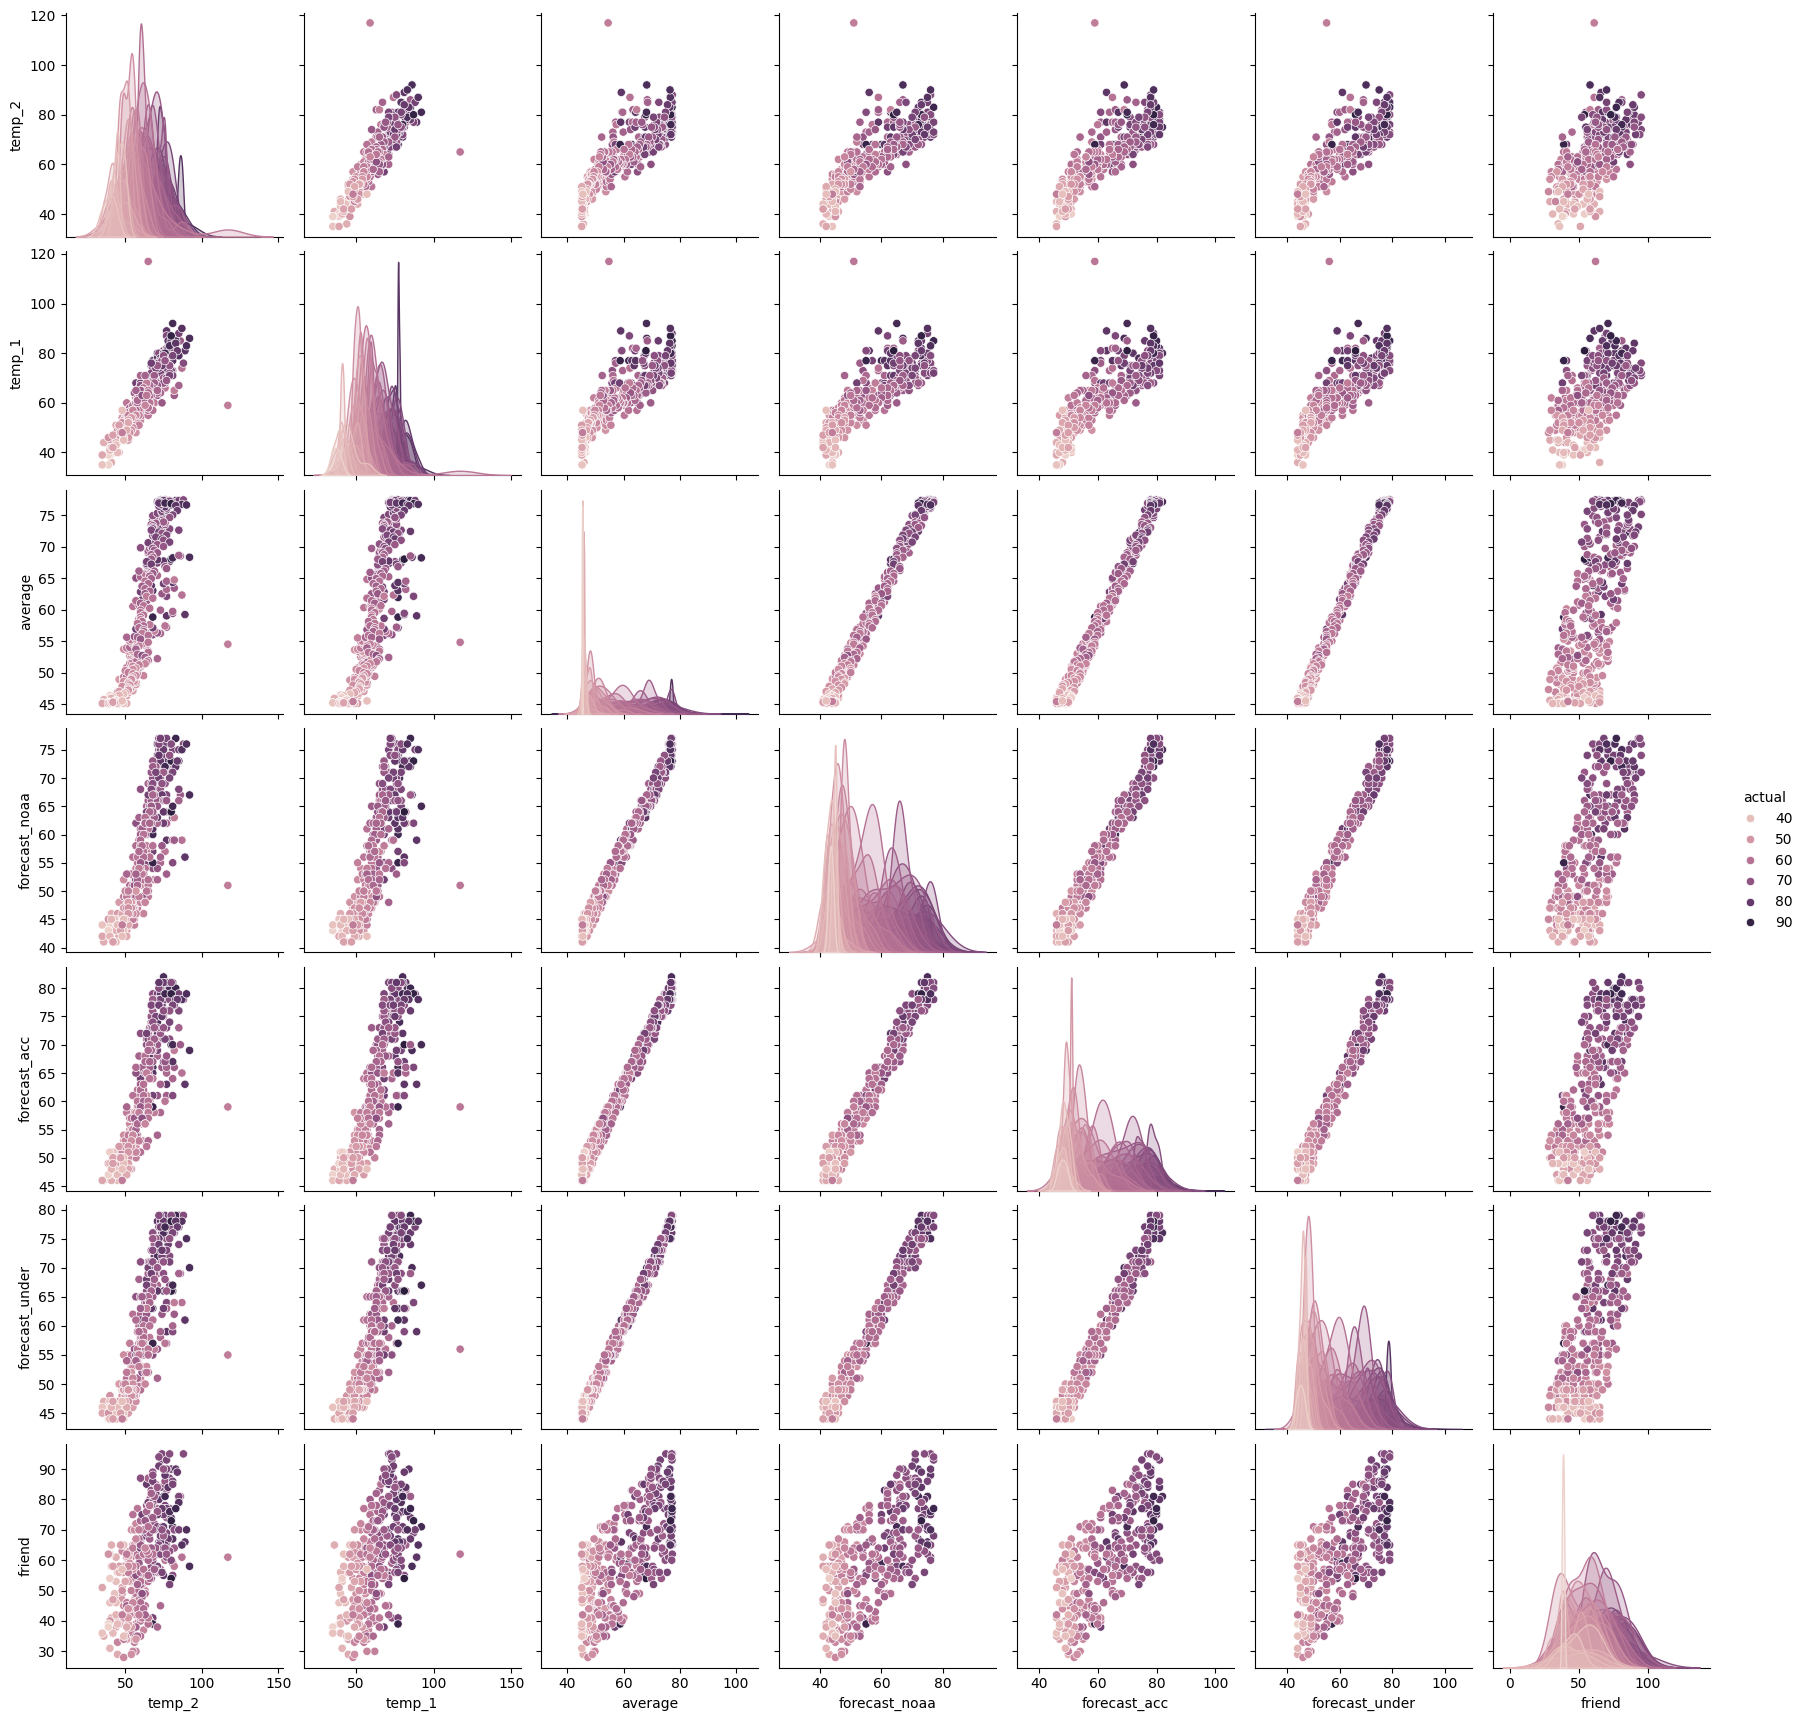

In [36]:
sns.pairplot(df, hue = 'actual')

### 3. Selecciona variables y divide en train y test

In [82]:
x = df.drop(columns = 'actual')
y = df['actual']

In [17]:
df

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,45,45,45.6,45,43,50,44,29
1,44,45,45.7,44,41,50,44,61
2,45,44,45.8,41,43,46,47,56
3,44,41,45.9,40,44,48,46,53
4,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...
343,42,42,45.2,47,41,50,47,47
344,42,47,45.3,48,41,49,44,58
345,47,48,45.3,48,43,50,45,65
346,48,48,45.4,57,44,46,44,42


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state= 42)

In [51]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(348, 7)
(348,)
(278, 7)
(70, 7)
(278,)
(70,)


### 4. Entrena el modelo


In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_clf = DecisionTreeRegressor(random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [53]:
tree_clf.score(x_train, y_train)

1.0

In [54]:
tree_clf.score(x_test, y_test)

0.7365079457749029

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [55]:
y_pred = tree_clf.predict(x_test)

In [56]:
print ('Coeficiente de determinación', round((tree_clf.score(x_test, y_test) * 100), 2), '%')
print( 'MAE', mean_absolute_error(y_test, y_pred))

Coeficiente de determinación 73.65 %
MAE 4.814285714285714


### 6. Representa el árbol de decisión

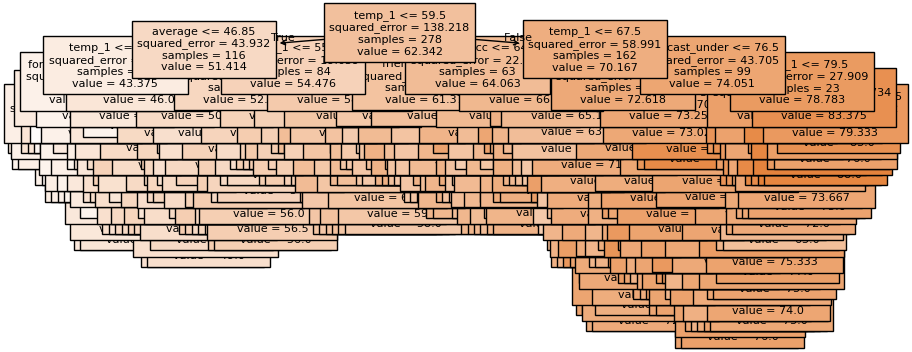

In [57]:
plt.figure(figsize=(10,4))
sklearn.tree.plot_tree(tree_clf,
               feature_names=df.drop(columns='actual').columns,
               class_names=df['actual'].unique().astype(str),
               filled = True,
               fontsize=8);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_clf2 = DecisionTreeRegressor(max_depth=3,
                                  random_state=42)
tree_clf2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 8. Vuelve a evaluar tu modelo

In [59]:
print ('Coeficiente de determinación', round((tree_clf2.score(x_test, y_test) * 100), 2), '%')

Coeficiente de determinación 76.09 %


### 9. Vuelve a representar su árbol

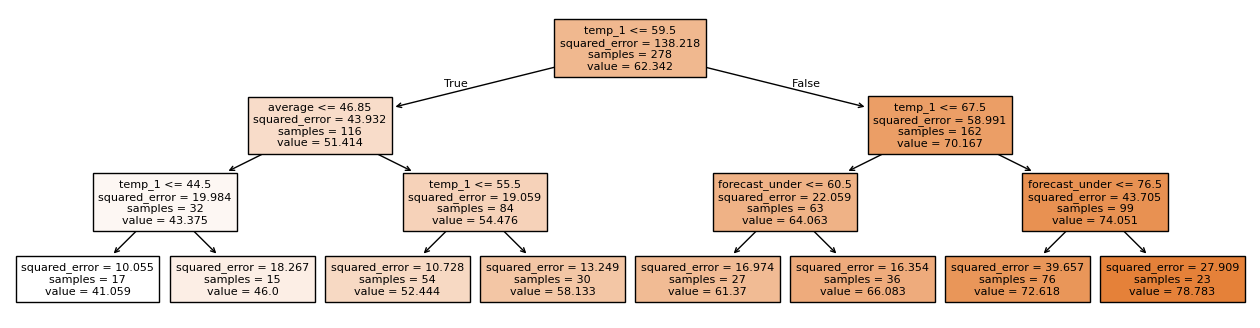

In [60]:
plt.figure(figsize=(16,4))
sklearn.tree.plot_tree(tree_clf2,
               feature_names=df.drop(columns='actual').columns,
               class_names=df['actual'].unique().astype(str),
               filled = True,
               fontsize=8);

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [70]:
from sklearn.model_selection import GridSearchCV

tree_clfgrid = DecisionTreeRegressor(random_state=42)
params = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_leaf' : [5,10,15],
    'criterion' : ['squared_error', 'absolute_error']
}
grid_search = GridSearchCV(
    estimator=tree_clfgrid,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1)

grid_search.fit(x_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación R^2:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros: {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 10}
Mejor puntuación R^2: 0.7919038966158987


In [67]:
best_max_depth = grid_search.best_params_['max_depth']

final_model = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42, criterion= 'squared_error', min_samples_leaf=10)
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)

In [68]:
r2 = metrics.r2_score(y_test, y_pred)
print("R^2 en datos de prueba:", round((r2 *100),2), '%')

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", round(mse, 2))


R^2 en datos de prueba: 81.57 %
Error cuadrático medio (MSE): 25.77


### 11. Obten el `feature_importances` de cada variable en el último modelo

In [133]:
print(final_model.feature_importances_)
print(final_model.feature_names_in_)

[0.         0.18124928 0.81213481 0.         0.         0.00661592
 0.        ]
['temp_2' 'temp_1' 'average' 'forecast_noaa' 'forecast_acc'
 'forecast_under' 'friend']


### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [120]:
df['target_c'] = np.where(df['actual'] > 59,'0','1')

In [121]:
yclass = df[['target_c']]
xclass = df[['temp_1', 'average']]

In [122]:
x_trainclass, x_testclass, y_trainclass, y_testclass = train_test_split(xclass, yclass, test_size=0.25, random_state= 10)

In [111]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [2, 3, 4, 5, 6, 7],
          'min_samples_leaf' : [5,10,15],
          'criterion' : ['gini', 'entropy'],
          'min_samples_split' : [10,20,30]}

grid_search_class = GridSearchCV(
    estimator=tree_class,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    verbose=1)

grid_search_class.fit(x_trainclass, y_trainclass)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30]},
             scoring='accuracy', verbose=1)

In [112]:
print("Mejores hiperparámetros:", grid_search_class.best_params_)
print("Mejor precisión:", grid_search_class.best_score_)
print("Mejor modelo:", grid_search_class.best_estimator_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20}
Mejor precisión: 0.9079100145137883
Mejor modelo: DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)


In [113]:
final_model_class = grid_search_class.best_estimator_
final_model_class.fit(x_trainclass, y_trainclass)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

In [114]:
y_pred_class = final_model_class.predict(x_testclass)

print(metrics.recall_score(y_testclass, y_pred_class))
print(metrics.roc_auc_score(y_testclass, y_pred_class))
print(metrics.precision_score(y_testclass, y_pred_class))
print(metrics.f1_score(y_testclass, y_pred_class))
print(metrics.confusion_matrix(y_testclass, y_pred_class))

ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = {'n_estimators' : [50,100],
          'max_depth': [2, 3, 4, 5],
          'min_samples_leaf' : [5,10,15],
        #   'criterion' : ['gini', 'entropy'],
        #   'min_samples_split' : [10,20,30]
        }

grid_search_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=params,
    cv=3,
    scoring='recall',
    verbose=0)

print(grid_search_rfc.fit(x_trainclass, y_trainclass))
print(grid_search_rfc.best_score_)
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_estimator_)